<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Point-Transforms" data-toc-modified-id="Point-Transforms-1">Point Transforms</a></span><ul class="toc-item"><li><span><a href="#Brightness" data-toc-modified-id="Brightness-1.1">Brightness</a></span></li></ul></li><li><span><a href="#Thresholding" data-toc-modified-id="Thresholding-2">Thresholding</a></span></li><li><span><a href="#Linear-Stretch" data-toc-modified-id="Linear-Stretch-3">Linear Stretch</a></span></li></ul></div>

In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
from time import time

# Point Transforms

## Brightness
$$
T(i)=\alpha i +\beta
$$

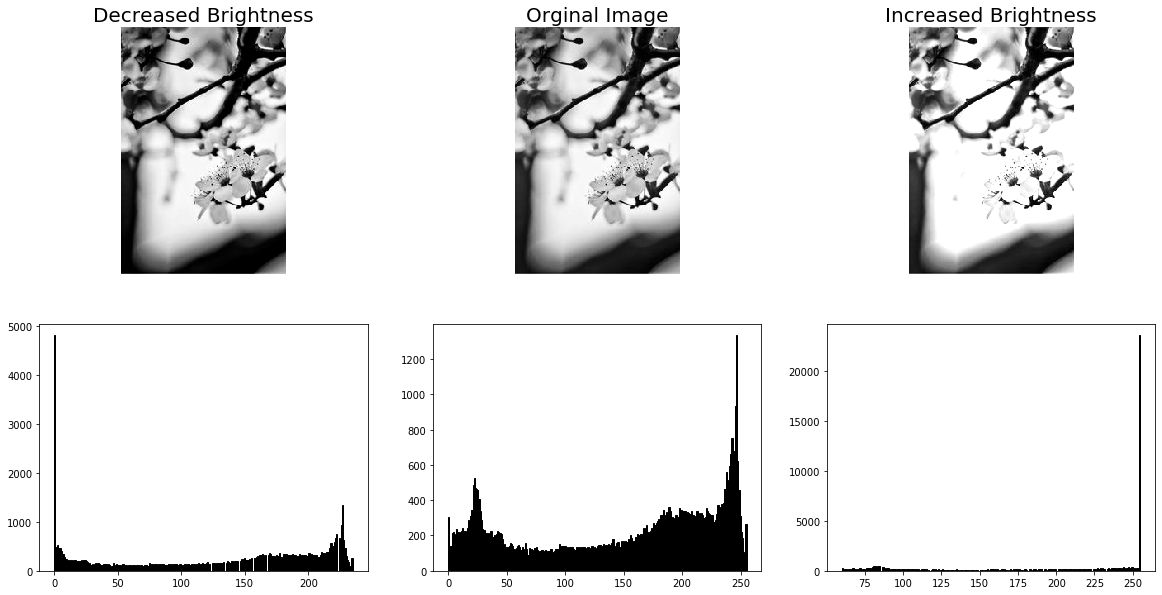

In [2]:
def changeBrightness(img,alpha,beta):
    img=alpha*img.copy().astype('int')+beta
    img[img<0]=0
    img[img>255]=255
    return img.astype(np.uint8)
img=cv2.imread('sample.jpg',0)
assert len(img)!=0, 'Picture not found'
IncreasedBrightness=changeBrightness(img,1,60)
DecreasedBrightness=changeBrightness(img,1,-20)
plt.figure(figsize=(20,10))
plt.subplot(2,3,1)
plt.imshow(DecreasedBrightness, cmap='gray')
plt.title('Decreased Brightness',fontsize='20')
plt.axis(False)
plt.subplot(2,3,2)
plt.imshow(img, cmap='gray')
plt.title('Orginal Image',fontsize='20')
plt.axis(False)
plt.subplot(2,3,3)
plt.imshow(IncreasedBrightness, cmap='gray')
plt.title('Increased Brightness',fontsize='20')
plt.axis(False)
plt.subplot(2,3,4)
plt.hist(DecreasedBrightness.ravel(),bins=256, fc='k', ec='k')
plt.subplot(2,3,5)
plt.hist(img.ravel(),bins=256, fc='k', ec='k')
plt.subplot(2,3,6)
plt.hist(IncreasedBrightness.ravel(),bins=256, fc='k', ec='k')
plt.show()

# Thresholding
$$
T( i) =\begin{cases}
V_{min} & i< t\\
V_{max} & i >t
\end{cases}
$$

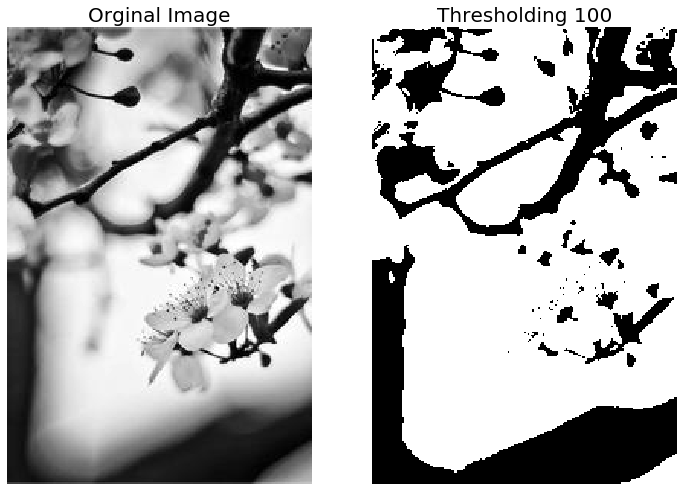

In [3]:
def threshold(img,t,vMin=0,vMax=255):
    outImg=img.copy()
    outImg[outImg<=t]=vMin
    outImg[outImg>t]=vMax
    return outImg
OrginalImg=cv2.imread('sample.jpg',0)
t=100
ThresholdImg=threshold(OrginalImg,t)
plt.figure(figsize=(12,10))
plt.subplot(1,2,1)
plt.title('Orginal Image',fontsize='20')
plt.imshow(OrginalImg ,cmap = 'gray')
plt.axis(False)
plt.subplot(1,2,2)
plt.title(f'Thresholding {t}', fontsize='20')
plt.imshow(ThresholdImg, cmap = 'gray')
plt.axis(False)
plt.show()

# Linear Stretch
$$
 \begin{array}{l}
T( x) =\begin{cases}
v_{min} & x< a\\
f( x) & a\leqslant x\leqslant b\\
v_{max} & x >b
\end{cases}\\
f( x) =mx+n\Longrightarrow \begin{cases}
ma+n=v_{min}\\
mb+n=v_{max}
\end{cases} \Longrightarrow \begin{cases}
m=\frac{v_{max} -v_{min}}{b-a}\\
n=\frac{bv_{min} -av_{max}}{b-a}
\end{cases}
\end{array}
$$
To increase the calculation time lets avoid `conditions`\
as we know
$$
Heaviside( x,a) =\begin{cases}
0 & x< 0\\
a & x=0\\
1 & x >0
\end{cases}
$$
using `np.heaviside` function we can rewrite $T$ function as well as:
$$
 \begin{array}{l}
T( x) =\begin{cases}
v_{min} & x< a\\
f( x) & a\leqslant x\leqslant b\\
v_{max} & x >b
\end{cases} =\begin{cases}
v_{min} & 0< a-x\\
f( x) & ( 0\leqslant x-a\leqslant b-a\equiv \ 0\leqslant x-a\ And\ x-a\leqslant b-a\\
v_{max} & x-b >0
\end{cases}\\
=\begin{cases}
v_{min} & H( a-x,0) =1\\
f( x) & H( x-a) \times H( \ b-x) =1\\
v_{max} & H( x-b) =1
\end{cases}\\
\Longrightarrow \boxed{T( x) =v_{min}\times H( a-x,0) +v_{max} \times H( x-b,0) +( mx+n) \times H( x-a,1) \times H( b-x,1)}
\end{array}
$$

0->0,  1->0,  2->0,  3->0,  4->0,  5->0,  6->0,  7->0,  8->0,  9->0,  10->0,  11->0,  12->0,  13->0,  14->0,  15->0,  16->0,  17->0,  18->0,  19->0,  20->0,  21->0,  22->0,  23->0,  24->0,  25->0,  26->0,  27->0,  28->0,  29->0,  30->0,  31->0,  32->0,  33->0,  34->0,  35->0,  36->0,  37->0,  38->0,  39->0,  40->0,  41->0,  42->0,  43->0,  44->0,  45->0,  46->0,  47->0,  48->0,  49->0,  50->0,  51->0,  52->0,  53->0,  54->0,  55->0,  56->0,  57->0,  58->0,  59->0,  60->0,  61->0,  62->0,  63->0,  64->0,  65->0,  66->0,  67->0,  68->0,  69->0,  70->0,  71->0,  72->0,  73->0,  74->0,  75->0,  76->0,  77->0,  78->0,  79->0,  80->0,  81->0,  82->0,  83->0,  84->0,  85->0,  86->0,  87->0,  88->0,  89->0,  90->0,  91->0,  92->0,  93->0,  94->0,  95->0,  96->0,  97->0,  98->0,  99->0,  100->0,  101->1,  102->2,  103->3,  104->4,  105->5,  106->6,  107->7,  108->8,  109->9,  110->10,  111->11,  112->12,  113->13,  114->14,  115->15,  116->16,  117->17,  118->18,  119->19,  120->20,  121->21,  

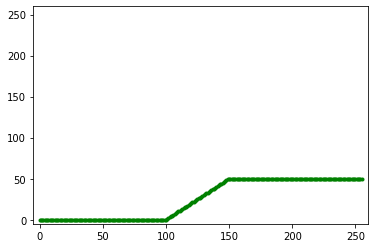

In [4]:
def linearStretch(img,a,b,Vmin,Vmax):
    if a>b: a,b=b,a
    if Vmin>Vmax: Vmin,Vmax=Vmax,Vmin
    m=(Vmax-Vmin)/(b-a)
    n=(b*Vmin-a*Vmax)/(b-a)
    return np.vectorize(lambda x,a,b,m,n,Vmin,Vmax:Vmin*np.heaviside(a-x,0)\
                                                  +Vmax*np.heaviside(x-b,0)\
                                                  +(m*x+n)*np.heaviside(x-a,1)\
                                                          *np.heaviside(b-x,1))\
           (img.astype(np.int16),a,b,m,n,Vmin,Vmax).astype(np.uint8)
print(",  ".join(f"{i}->{j}" for i,j in zip(np.arange(256),
                                            linearStretch(np.arange(256),
                                                          100,150,0,50)
                                           )
                )
     )
plt.plot(np.arange(256),linearStretch(np.arange(256),100,150,0,50),'g.')
plt.xlim(-5,260)
plt.ylim(-5,260)
plt.show()

the time elapsed for calculation is: 1.8074896335601807


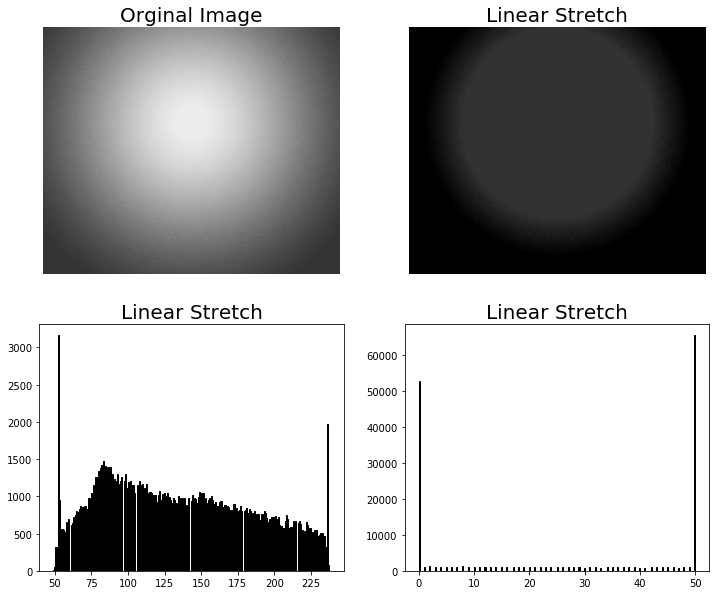

In [5]:
OrginalImg=cv2.imread('grayGradiant.jpg',0)
start=time()
StretchedImg=linearStretch(OrginalImg,100,150,0,50)
print(f"the time elapsed for calculation is: {time()-start}")
plt.figure(figsize=(12,10))
plt.subplot(2,2,1)
plt.title('Orginal Image',fontsize='20')
plt.imshow(OrginalImg,cmap='gray',vmin=0,vmax=255)
plt.axis(False)
plt.subplot(2,2,2)
plt.title('Linear Stretch', fontsize='20')
plt.imshow(StretchedImg,cmap='gray',vmin=0,vmax=255)
plt.axis(False)
plt.subplot(2,2,3)
plt.title('Linear Stretch', fontsize='20')
plt.hist(OrginalImg.ravel(),bins=256, fc='k', ec='k')
plt.subplot(2,2,4)
plt.title('Linear Stretch', fontsize='20')
plt.hist(StretchedImg.ravel(),bins=256, fc='k', ec='k')
plt.show()

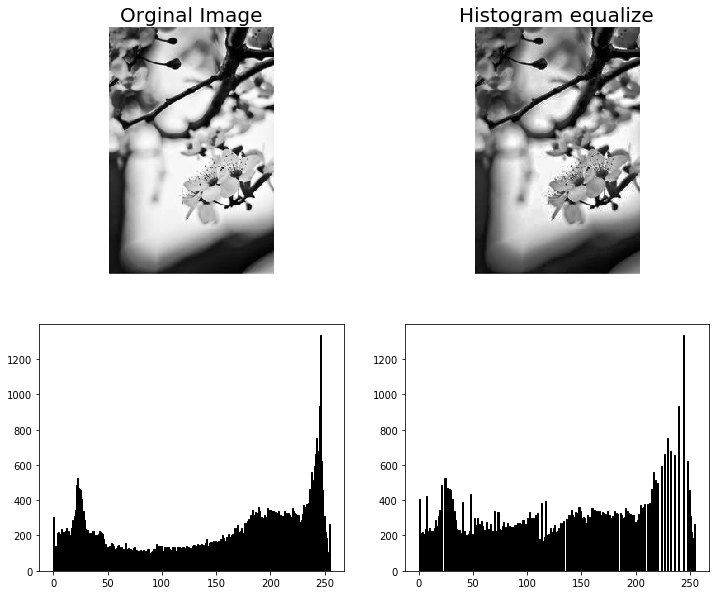

In [6]:
OrginalImg=cv2.imread('sample.jpg',0)
equalizeHist = cv2.equalizeHist(OrginalImg)
plt.figure(figsize=(12,10))
plt.subplot(221)
plt.title('Orginal Image',fontsize='20')
plt.imshow(OrginalImg ,cmap = 'gray')
plt.axis('off')
plt.subplot(222)
plt.title('Histogram equalize', fontsize='20')
plt.imshow(equalizeHist, cmap = 'gray')
plt.axis('off')
plt.subplot(223)
plt.hist(OrginalImg.ravel(),bins=256, fc='k', ec='k')
plt.subplot(224)
plt.hist(equalizeHist.ravel(),bins=256, fc='k', ec='k')
plt.show()